In [377]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


In [378]:
df=pd.read_csv("/content/drive/MyDrive/AI assesment/Student Depression Dataset.csv")

In [379]:
df.shape

(27901, 18)

In [380]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [381]:
df.tail()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1
27900,140699,Male,27.0,Patna,Student,4.0,0.0,9.24,1.0,0.0,Less than 5 hours,Healthy,BCA,Yes,2.0,3.0,Yes,1


In [382]:
df.drop(["id"],axis=1, inplace=True)

In [383]:
df.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [384]:
df["Gender"]=df["Gender"].replace({"Male":0,"Female":1})
df.head()

<ipython-input-384-07b2baeb3baa>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"]=df["Gender"].replace({"Male":0,"Female":1})


,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,1,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,0,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,1,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,1,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  int64  
 1   Age                                    27901 non-null  float64
 2   City                                   27901 non-null  object 
 3   Profession                             27901 non-null  object 
 4   Academic Pressure                      27901 non-null  float64
 5   Work Pressure                          27901 non-null  float64
 6   CGPA                                   27901 non-null  float64
 7   Study Satisfaction                     27901 non-null  float64
 8   Job Satisfaction                       27901 non-null  float64
 9   Sleep Duration                         27901 non-null  object 
 10  Dietary Habits                         27901 non-null  object 
 11  De

In [386]:
df["City"].value_counts()

,count
City,
Kalyan,1570
Srinagar,1372
Hyderabad,1340
Vasai-Virar,1290
Lucknow,1155
Thane,1139
Ludhiana,1111
Agra,1094
Surat,1078


In [387]:
df = df[df["City"].map(df["City"].value_counts())>=400]
df["City"].value_counts()

,count
City,
Kalyan,1570
Srinagar,1372
Hyderabad,1340
Vasai-Virar,1290
Lucknow,1155
Thane,1139
Ludhiana,1111
Agra,1094
Surat,1078


In [388]:
df["Profession"].value_counts()

,count
Profession,
Student,27844
Architect,8
Teacher,6
Digital Marketer,3
Content Writer,2
Chef,2
Doctor,2
Pharmacist,2
Civil Engineer,1


In [389]:
df = df[df['Profession'].map(df['Profession'].value_counts()) >= 100]
df = df.drop(columns=['Profession'])

In [390]:
df.head()

,Gender,Age,City,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33.0,Visakhapatnam,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,1,24.0,Bangalore,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,0,31.0,Srinagar,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,1,28.0,Varanasi,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,1,25.0,Jaipur,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [391]:
df['Academic Pressure'].value_counts()

,count
Academic Pressure,
3.0,7441
5.0,6283
4.0,5146
1.0,4796
2.0,4169
0.0,9


In [392]:
df = df[df['Academic Pressure'].map(df['Academic Pressure'].value_counts()) >= 10]
df['Academic Pressure'].value_counts()

,count
Academic Pressure,
3.0,7441
5.0,6283
4.0,5146
1.0,4796
2.0,4169


In [393]:
#initializing encoder without removing any categories
encoder= OneHotEncoder(sparse_output=False) #this keeps all categories

encoded_array=encoder.fit_transform(df[["Academic Pressure"]])

encoded_df=pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(["Academic Pressure"]))

df=pd.concat([df.drop("Academic Pressure", axis=1), encoded_df],axis=1)

df.head()

,Gender,Age,City,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Academic Pressure_1.0,Academic Pressure_2.0,Academic Pressure_3.0,Academic Pressure_4.0,Academic Pressure_5.0
0,0.0,33.0,Visakhapatnam,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,24.0,Bangalore,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,31.0,Srinagar,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,28.0,Varanasi,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,25.0,Jaipur,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0.0,0.0,0.0,0.0,1.0,0.0


In [394]:
df["Age"].value_counts()

,count
Age,
24.0,2254
20.0,2233
28.0,2128
29.0,1940
33.0,1892
25.0,1780
21.0,1717
23.0,1640
18.0,1584


In [395]:
df=df[df["Age"].map(df["Age"].value_counts())>=11]

In [396]:
df["Work Pressure"].value_counts()

,count
Work Pressure,
0.0,27788


In [397]:
df = df.drop(columns=["Work Pressure"])

In [398]:
df["Study Satisfaction"].value_counts()

,count
Study Satisfaction,
4.0,6338
2.0,5821
3.0,5796
1.0,5426
5.0,4404
0.0,3


In [399]:
df = df[df['Study Satisfaction'].map(df['Study Satisfaction'].value_counts()) >= 4]

In [400]:
df['Job Satisfaction'].value_counts()

,count
Job Satisfaction,
0.0,27783
3.0,1
2.0,1


In [401]:
df = df[df['Job Satisfaction'].map(df['Job Satisfaction'].value_counts()) >= 2]

In [402]:
df['Job Satisfaction'].value_counts()

,count
Job Satisfaction,
0.0,27783


In [403]:
df.drop(columns=['Job Satisfaction'], inplace = True)

In [404]:
df['Dietary Habits'].value_counts()

,count
Dietary Habits,
Unhealthy,10279
Moderate,9874
Healthy,7618
Others,12


In [405]:
df = df[df['Dietary Habits'].map(df['Dietary Habits'].value_counts()) >= 13]

In [406]:
df['Dietary Habits'].value_counts()

,count
Dietary Habits,
Unhealthy,10279
Moderate,9874
Healthy,7618


In [407]:
# initializing the encoder without dropping any categories
encoder = OneHotEncoder(sparse_output=False)  # Keeps all categories

# fitting and transform the 'Dietary Habits' column
encoded_array = encoder.fit_transform(df[['Dietary Habits']])

# encoded array converted to df
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Dietary Habits']))

# joining the df to the original dataset
df = pd.concat([df.drop('Dietary Habits', axis =1), encoded_df], axis=1)

# showing the updated DataFrame
df.head()

,Gender,Age,City,CGPA,Study Satisfaction,Sleep Duration,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Academic Pressure_1.0,Academic Pressure_2.0,Academic Pressure_3.0,Academic Pressure_4.0,Academic Pressure_5.0,Dietary Habits_Healthy,Dietary Habits_Moderate,Dietary Habits_Unhealthy
0,0.0,33.0,Visakhapatnam,8.97,2.0,5-6 hours,B.Pharm,Yes,3.0,1.0,No,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,24.0,Bangalore,5.90,5.0,5-6 hours,BSc,No,3.0,2.0,Yes,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,31.0,Srinagar,7.03,5.0,Less than 5 hours,BA,No,9.0,1.0,Yes,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,28.0,Varanasi,5.59,2.0,7-8 hours,BCA,Yes,4.0,5.0,Yes,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,25.0,Jaipur,8.13,3.0,5-6 hours,M.Tech,Yes,1.0,1.0,No,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [408]:
df['Have you ever had suicidal thoughts ?'].value_counts()

,count
Have you ever had suicidal thoughts ?,
Yes,17578
No,10193


In [409]:
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].replace({'No': 0, 'Yes': 1})
df.head()

<ipython-input-409-b77541a830ce>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].replace({'No': 0, 'Yes': 1})


,Gender,Age,City,CGPA,Study Satisfaction,Sleep Duration,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Academic Pressure_1.0,Academic Pressure_2.0,Academic Pressure_3.0,Academic Pressure_4.0,Academic Pressure_5.0,Dietary Habits_Healthy,Dietary Habits_Moderate,Dietary Habits_Unhealthy
0,0.0,33.0,Visakhapatnam,8.97,2.0,5-6 hours,B.Pharm,1.0,3.0,1.0,No,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,24.0,Bangalore,5.90,5.0,5-6 hours,BSc,0.0,3.0,2.0,Yes,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,31.0,Srinagar,7.03,5.0,Less than 5 hours,BA,0.0,9.0,1.0,Yes,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,28.0,Varanasi,5.59,2.0,7-8 hours,BCA,1.0,4.0,5.0,Yes,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,25.0,Jaipur,8.13,3.0,5-6 hours,M.Tech,1.0,1.0,1.0,No,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [410]:
df['Family History of Mental Illness'].value_counts()

,count
Family History of Mental Illness,
No,14333
Yes,13438


In [411]:
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].replace({'No': 0, 'Yes': 1})
df.head()

<ipython-input-411-d228fd61bcf9>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Family History of Mental Illness'] = df['Family History of Mental Illness'].replace({'No': 0, 'Yes': 1})


,Gender,Age,City,CGPA,Study Satisfaction,Sleep Duration,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Academic Pressure_1.0,Academic Pressure_2.0,Academic Pressure_3.0,Academic Pressure_4.0,Academic Pressure_5.0,Dietary Habits_Healthy,Dietary Habits_Moderate,Dietary Habits_Unhealthy
0,0.0,33.0,Visakhapatnam,8.97,2.0,5-6 hours,B.Pharm,1.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,24.0,Bangalore,5.90,5.0,5-6 hours,BSc,0.0,3.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,31.0,Srinagar,7.03,5.0,Less than 5 hours,BA,0.0,9.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,28.0,Varanasi,5.59,2.0,7-8 hours,BCA,1.0,4.0,5.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,25.0,Jaipur,8.13,3.0,5-6 hours,M.Tech,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [412]:
df['Sleep Duration'].value_counts()

,count
Sleep Duration,
Less than 5 hours,8275
7-8 hours,7309
5-6 hours,6149
More than 8 hours,6020
Others,18


In [413]:
df = df[df['Sleep Duration'].map(df['Sleep Duration'].value_counts()) >= 20]

In [414]:
# mapping for sleep duration
sleep_duration_mapping = {
    'Less than 5 hours': 0,
    '5-6 hours': 1,
    '7-8 hours': 2,
    'More than 8 hours': 3
}

# mapping to change values in sleep duration
df.loc[:, 'Sleep Duration'] = df['Sleep Duration'].replace(sleep_duration_mapping).infer_objects(copy=False)

<ipython-input-414-874e30625e03>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, 'Sleep Duration'] = df['Sleep Duration'].replace(sleep_duration_mapping).infer_objects(copy=False)


In [415]:
df.head()

,Gender,Age,City,CGPA,Study Satisfaction,Sleep Duration,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Academic Pressure_1.0,Academic Pressure_2.0,Academic Pressure_3.0,Academic Pressure_4.0,Academic Pressure_5.0,Dietary Habits_Healthy,Dietary Habits_Moderate,Dietary Habits_Unhealthy
0,0.0,33.0,Visakhapatnam,8.97,2.0,1,B.Pharm,1.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,24.0,Bangalore,5.90,5.0,1,BSc,0.0,3.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,31.0,Srinagar,7.03,5.0,0,BA,0.0,9.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,28.0,Varanasi,5.59,2.0,2,BCA,1.0,4.0,5.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,25.0,Jaipur,8.13,3.0,1,M.Tech,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [416]:
df['Degree'].value_counts()

,count
Degree,
Class 12,6054
B.Ed,1857
B.Com,1500
B.Arch,1473
BCA,1429
MSc,1181
B.Tech,1151
MCA,1035
M.Tech,1018


In [417]:
df = df[df['Degree'].map(df['Degree'].value_counts()) >= 36]

In [418]:
df['Degree'].unique()

array(['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', 'PhD', 'Class 12', 'B.Ed',
       'LLB', 'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'MA', 'B.Com',
       'MD', 'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech', 'BBA',
       'ME', 'MHM'], dtype=object)

In [419]:
# conditions to add to new degree
conditions = [
    df['Degree'].str.contains(r'BSc|BCA|B\.Ed|BHM|B\.Pharm|B\.Com|BE|BA|B\.Arch|B\.Tech|BBA|LLB', regex=True),
    df['Degree'].str.contains(r'MSc|MCA|M\.Ed|M\.Pharm|M\.Com|ME|MA|M\.Arch|M\.Tech|MBA|LLM', regex=True),
    df['Degree'] == 'Class 12'
]

# defining names for each condition
choices = ['Graduated', 'Post Graduated', 'Higher Secondary']

# create new column for the choices
df['New_Degree'] = np.select(conditions, choices, default=np.nan)

df = df[df['Degree'] != 'Others']

<ipython-input-419-190810f26b0e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['New_Degree'] = np.select(conditions, choices, default=np.nan)


In [420]:
df.drop(["Degree"],axis= 1, inplace = True)

In [421]:
df.head()

,Gender,Age,City,CGPA,Study Satisfaction,Sleep Duration,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Academic Pressure_1.0,Academic Pressure_2.0,Academic Pressure_3.0,Academic Pressure_4.0,Academic Pressure_5.0,Dietary Habits_Healthy,Dietary Habits_Moderate,Dietary Habits_Unhealthy,New_Degree
0,0.0,33.0,Visakhapatnam,8.97,2.0,1,1.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,Graduated
1,1.0,24.0,Bangalore,5.90,5.0,1,0.0,3.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Graduated
2,0.0,31.0,Srinagar,7.03,5.0,0,0.0,9.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,Graduated
3,1.0,28.0,Varanasi,5.59,2.0,2,1.0,4.0,5.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Graduated
4,1.0,25.0,Jaipur,8.13,3.0,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,Post Graduated


In [422]:
# mapping for degree
New_Degree_mapping = {
    'Graduated': 0,
    'Post Graduated': 1,
    'Higher Secondary': 2,
}

# Replace values in the 'Degree' column using the mapping
df['New_Degree'] = df['New_Degree'].replace(New_Degree_mapping)

df.head()

,Gender,Age,City,CGPA,Study Satisfaction,Sleep Duration,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Academic Pressure_1.0,Academic Pressure_2.0,Academic Pressure_3.0,Academic Pressure_4.0,Academic Pressure_5.0,Dietary Habits_Healthy,Dietary Habits_Moderate,Dietary Habits_Unhealthy,New_Degree
0,0.0,33.0,Visakhapatnam,8.97,2.0,1,1.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0
1,1.0,24.0,Bangalore,5.90,5.0,1,0.0,3.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,0.0,31.0,Srinagar,7.03,5.0,0,0.0,9.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
3,1.0,28.0,Varanasi,5.59,2.0,2,1.0,4.0,5.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
4,1.0,25.0,Jaipur,8.13,3.0,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1


In [423]:
df.isnull().sum()

,0
Gender,0
Age,0
City,0
CGPA,0
Study Satisfaction,0
Sleep Duration,0
Have you ever had suicidal thoughts ?,0
Work/Study Hours,0
Financial Stress,3
Family History of Mental Illness,0


In [424]:
df = df.dropna()
df = df.drop(["City"],axis=1)

In [425]:
numerical_df = df.select_dtypes(include='number')
correlation_matrix = numerical_df.corr()

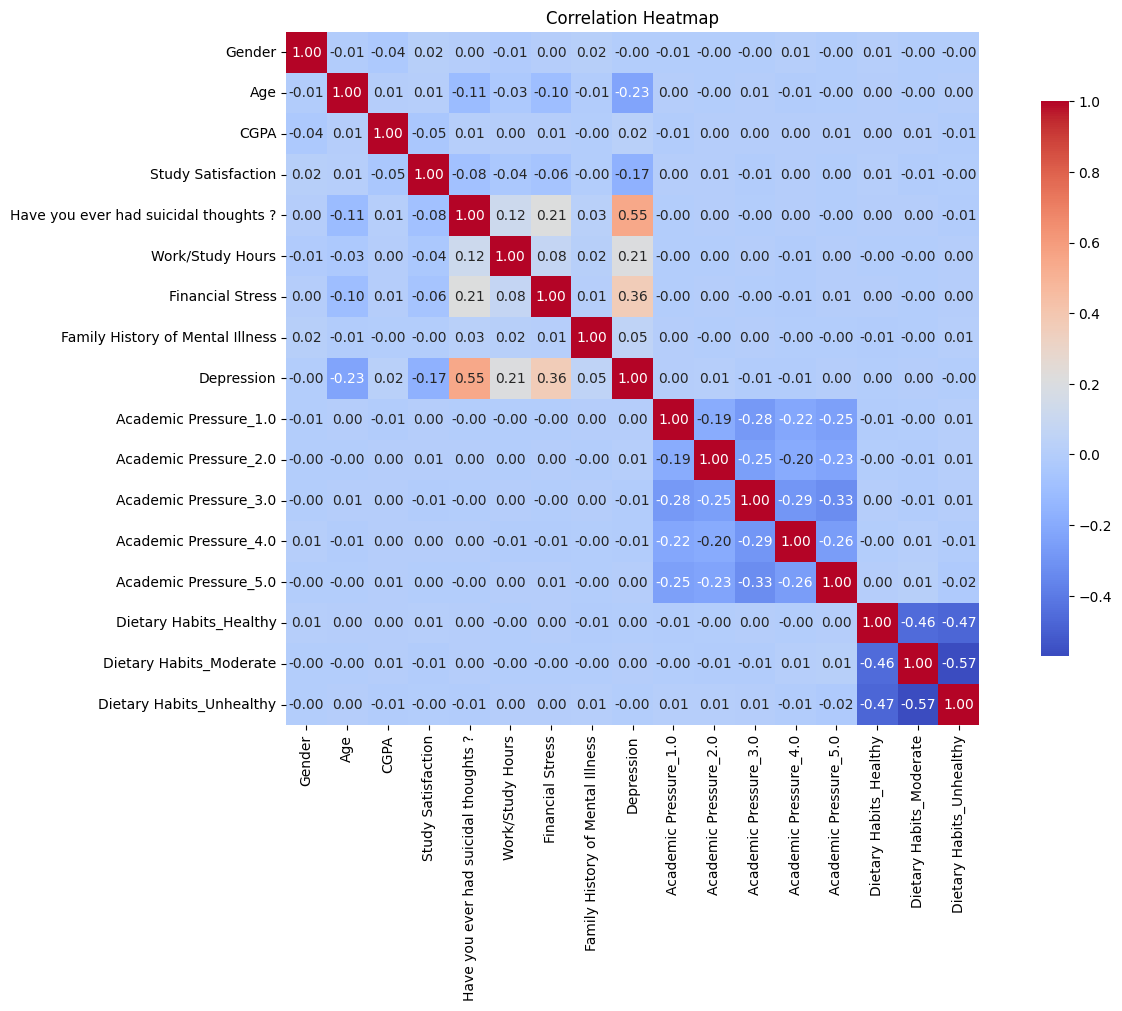

In [426]:
plt.figure(figsize=(16, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

In [427]:
df.shape

(27586, 19)

In [428]:
df.dtypes

,0
Gender,float64
Age,float64
CGPA,float64
Study Satisfaction,float64
Sleep Duration,object
Have you ever had suicidal thoughts ?,float64
Work/Study Hours,float64
Financial Stress,float64
Family History of Mental Illness,float64
Depression,float64


In [429]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,27586.0,0.442543,0.496697,0.0,0.00,0.00,1.00,1.0
Age,27586.0,25.791452,4.864394,18.0,21.00,25.00,30.00,34.0
CGPA,27586.0,7.660465,1.465773,0.0,6.29,7.77,8.92,10.0
Study Satisfaction,27586.0,2.943848,1.359664,1.0,2.00,3.00,4.00,5.0
Have you ever had suicidal thoughts ?,27586.0,0.633256,0.481925,0.0,0.00,1.00,1.00,1.0
Work/Study Hours,27586.0,7.161894,3.705269,0.0,4.00,8.00,10.00,12.0
Financial Stress,27586.0,3.139382,1.436911,1.0,2.00,3.00,4.00,5.0
Family History of Mental Illness,27586.0,0.484267,0.499761,0.0,0.00,0.00,1.00,1.0
Depression,27586.0,0.586203,0.492522,0.0,0.00,1.00,1.00,1.0
Academic Pressure_1.0,27586.0,0.172515,0.377834,0.0,0.00,0.00,0.00,1.0


In [430]:
df.describe(include='object').T

,count,unique,top,freq
Sleep Duration,27586,4,0,8219
New_Degree,27586,4,0,13087


In [431]:
df.isnull().sum()

,0
Gender,0
Age,0
CGPA,0
Study Satisfaction,0
Sleep Duration,0
Have you ever had suicidal thoughts ?,0
Work/Study Hours,0
Financial Stress,0
Family History of Mental Illness,0
Depression,0


In [432]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
27766,False
27767,False
27768,False
27769,False


**EDA**

In [433]:
# defining x and y
X = df.drop(columns=["Depression"]).values  # columns except target
y = df["Depression"].values  # target

# spliting into 80 20 train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("loaded and preprocessed successfully")

loaded and preprocessed successfully


In [434]:
print(np.isnan(X_train).sum())  # total NaN values

1586


In [435]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [436]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

**Logistic Regression From Scratch**

In [437]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(y, y_pred):
    """Calculates the cross-entropy cost."""
    m = len(y)
    cost = (-1/m) * np.sum(y * np.log(y_pred + 1e-8) + (1 - y) * np.log(1 - y_pred + 1e-8)) # Adding small value to avoid log(0)
    return cost

class LogisticRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr  # Learning rate
        self.epochs = epochs  # iterations
        self.weights = None  # initializing weight
        self.bias = None  # initializing weight
        self.cost_history = [] # To store cost at each iteration

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)  # weight to zero
        self.bias = 0  # bias to zero

        # train loop
        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias  # Linear model output
            y_predicted = sigmoid(linear_model)  # Apply sigmoid function

            # Calculate cost
            cost = cost_function(y, y_predicted) # Calculating the cost
            self.cost_history.append(cost) # Storing cost history

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))  # gradient for weight
            db = (1 / n_samples) * np.sum(y_predicted - y)  # gradient for bias

            # updating weight and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias  # linear model output
        y_predicted = sigmoid(linear_model)  # sigmoid function
        return [1 if i > 0.5 else 0 for i in y_predicted]  # return in 0 and 1

In [438]:
model_scratch = LogisticRegressionScratch(lr=0.01, epochs=1000)

# model train
model_scratch.fit(X_train_balanced, y_train_balanced)

# prediction on test set
y_pred_scratch = model_scratch.predict(X_test)

# models performance on training set
y_train_pred_scratch = model_scratch.predict(X_train_balanced)
train_accuracy = accuracy_score(y_train_balanced, y_train_pred_scratch)
train_precision = precision_score(y_train_balanced, y_train_pred_scratch)
train_recall = recall_score(y_train_balanced, y_train_pred_scratch)
train_f1 = f1_score(y_train_balanced, y_train_pred_scratch)

# models performance on test set
y_test_pred_scratch = model_scratch.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred_scratch)
test_precision = precision_score(y_test, y_test_pred_scratch)
test_recall = recall_score(y_test, y_test_pred_scratch)
test_f1 = f1_score(y_test, y_test_pred_scratch)

# show results
print("Scratch model performance on Training Set:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")

print("\nScratch model performance on Test Set:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")

# models performance output
accuracy = accuracy_score(y_test, y_pred_scratch)
precision = precision_score(y_test, y_pred_scratch)
recall = recall_score(y_test, y_pred_scratch)
f1 = f1_score(y_test, y_pred_scratch)

# show result
print("Scratch model output:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Scratch model performance on Training Set:
Accuracy: 0.8005
Precision: 0.7928
Recall: 0.8136
F1 Score: 0.8030

Scratch model performance on Test Set:
Accuracy: 0.8030
Precision: 0.8402
Recall: 0.8142
F1 Score: 0.8270
Scratch model output:
Accuracy: 0.8030
Precision: 0.8402
Recall: 0.8142
F1 Score: 0.8270


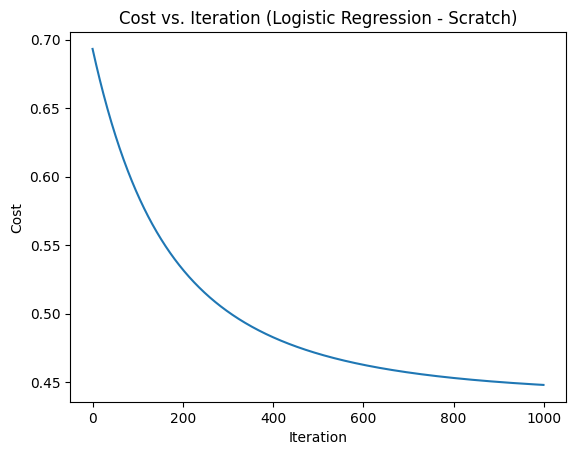

In [439]:
plt.plot(range(model_scratch.epochs), model_scratch.cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost vs. Iteration (Logistic Regression - Scratch)")
plt.show()

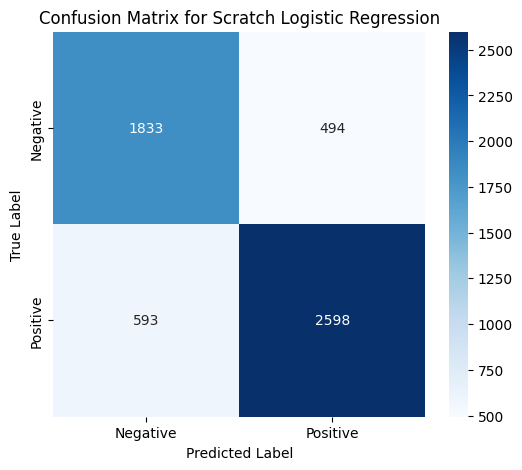

In [440]:
cm = confusion_matrix(y_test,y_pred_scratch)

plt.figure(figsize=(6, 5))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

plt.xlabel("Predicted Label")

plt.ylabel("True Label")

plt.title("Confusion Matrix for Scratch Logistic Regression")

plt.show()


**Creating models from sklearn**

Logistic Regression

In [441]:
accuracy_history_sklearn = []

# Train the model with increasing max_iter and track accuracy
max_iterations = 200  # can increase or decrease the number of iterations
for i in range(1, max_iterations + 1, 10): # can control how often (step) it gets the accuracy
    model_sklearn = LogisticRegression(max_iter=i)
    model_sklearn.fit(X_train_balanced, y_train_balanced)
    y_pred_sklearn = model_sklearn.predict(X_test)
    accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
    accuracy_history_sklearn.append(accuracy_sklearn)


model_sklearn = LogisticRegression(max_iter=1000)
model_sklearn.fit(X_train_balanced, y_train_balanced)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

Logistic Regression (Sklearn):
Accuracy: 0.8046
Precision: 0.8387
Recall: 0.8198
F1 Score: 0.8292


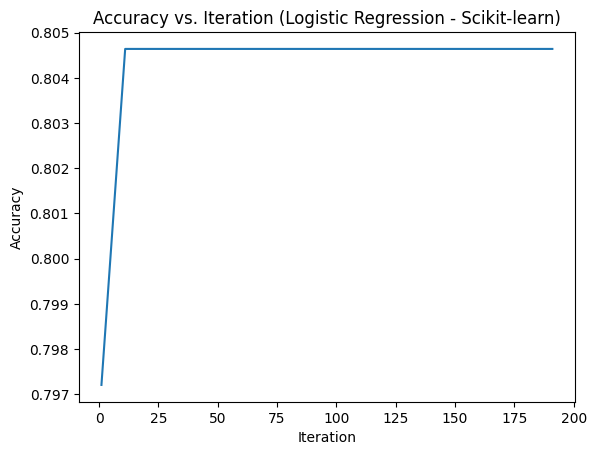

In [442]:
y_pred_sklearn = model_sklearn.predict(X_test)

accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn)
recall_sklearn = recall_score(y_test, y_pred_sklearn)
f1_sklearn = f1_score(y_test, y_pred_sklearn)

print("Logistic Regression (Sklearn):")
print(f"Accuracy: {accuracy_sklearn:.4f}")
print(f"Precision: {precision_sklearn:.4f}")
print(f"Recall: {recall_sklearn:.4f}")
print(f"F1 Score: {f1_sklearn:.4f}")

# Plotting Accuracy vs. Iteration (Scikit-learn)
plt.plot(range(1, max_iterations + 1, 10), accuracy_history_sklearn)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Iteration (Logistic Regression - Scikit-learn)")
plt.show()

Random Forest

Cross-validation scores: [0.79904848 0.78432261 0.79927503 0.80716066 0.80512123]
Mean cross-validation score: 0.7989856040731492
Random Forest Classification:
Accuracy: 0.8023
Precision: 0.8015
Recall: 0.8023
F1 Score: 0.8010
                                  Feature  Importance
5   Have you ever had suicidal thoughts ?    0.247607
2                                    CGPA    0.132956
7                        Financial Stress    0.112224
1                                     Age    0.104727
6                        Work/Study Hours    0.098620
3                      Study Satisfaction    0.059006
4                          Sleep Duration    0.046862
17                             New_Degree    0.037717
0                                  Gender    0.023500
8        Family History of Mental Illness    0.019802
15                Dietary Habits_Moderate    0.015940
16               Dietary Habits_Unhealthy    0.015675
11                  Academic Pressure_3.0    0.015626
13               

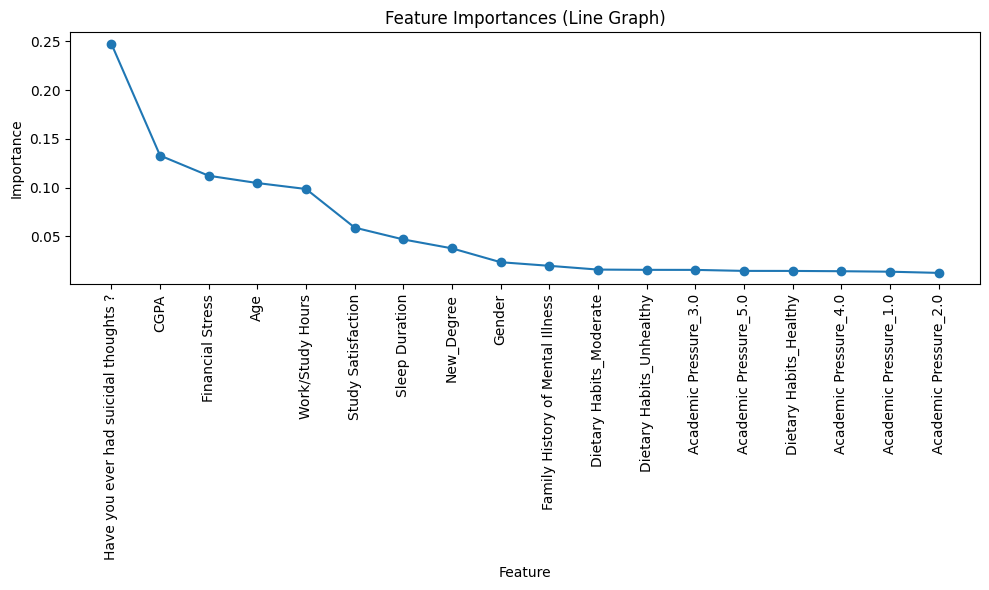

In [443]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# train random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# predictions
y_pred_rf = rf_model.predict(X_test)

# Cross-Validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold CV
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')  # Use 'macro' or 'weighted' based on class imbalance
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("Random Forest Classification:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")

feature_importances = rf_model.feature_importances_

# If you have feature names
feature_names = [
    "Gender", "Age", "CGPA", "Study Satisfaction", "Sleep Duration",
    "Have you ever had suicidal thoughts ?", "Work/Study Hours",
    "Financial Stress", "Family History of Mental Illness",
    "Academic Pressure_1.0", "Academic Pressure_2.0", "Academic Pressure_3.0",
    "Academic Pressure_4.0", "Academic Pressure_5.0",
    "Dietary Habits_Healthy", "Dietary Habits_Moderate", "Dietary Habits_Unhealthy",
    "New_Degree"
]  # Replace with your actual feature names
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

print(feature_importance_df)

# Plot feature importances (Line Graph)
plt.figure(figsize=(10, 6))
plt.plot(feature_importance_df['Feature'], feature_importance_df['Importance'], marker='o')  # Changed to plot
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances (Line Graph)")
plt.tight_layout()
plt.show()

In [444]:
performance_data = {
    'Model': ['Logistic Regression (Sklearn)', 'Random Forest'],
    'Accuracy': [accuracy_sklearn, accuracy_rf],
    'Precision': [precision_sklearn, precision_rf],
    'Recall': [recall_sklearn, recall_rf],
    'F1 Score': [f1_sklearn, f1_rf]
}

performance_df = pd.DataFrame(performance_data)
print(performance_df)

                           Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression (Sklearn)  0.804639   0.838730  0.819806  0.829160
1                  Random Forest  0.802283   0.801509  0.802283  0.801026


Hyper parameter optimization

for logistic reg

In [445]:
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

In [446]:
# hyperparameter to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  #  strength of regularization
    'max_iter': [100, 500, 1000]  # iterations
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# initialize log reg and gridsearchcv
model_sklearn = LogisticRegression()
grid_search = GridSearchCV(estimator=model_sklearn, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=1)

# model fit
grid_search.fit(X_train_balanced, y_train_balanced)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
Best Parameters: {'C': 0.1, 'max_iter': 100}
Best Cross-Validation Score: 0.8004237288135594


In [447]:
best_model_lr = LogisticRegression(C=0.1, max_iter=100)

# train
best_model_lr.fit(X_train_balanced, y_train_balanced)

# prediction
y_pred_sklearn = best_model_lr.predict(X_test)

# evaluation
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn)
recall_sklearn = recall_score(y_test, y_pred_sklearn)
f1_sklearn = f1_score(y_test, y_pred_sklearn)

print("Logistic Regression (Sklearn) after Tuning:")
print(f"Accuracy: {accuracy_sklearn:.4f}")
print(f"Precision: {precision_sklearn:.4f}")
print(f"Recall: {recall_sklearn:.4f}")
print(f"F1 Score: {f1_sklearn:.4f}")

Logistic Regression (Sklearn) after Tuning:
Accuracy: 0.8046
Precision: 0.8387
Recall: 0.8198
F1 Score: 0.8292


In [448]:
performance_data = {
    'Model': ['Logistic Regression (Sklearn)', 'Random Forest'],
    'Accuracy': [accuracy_sklearn, accuracy_rf],
    'Precision': [precision_sklearn, precision_rf],
    'Recall': [recall_sklearn, recall_rf],
    'F1 Score': [f1_sklearn, f1_rf]
}
performance_df = pd.DataFrame(performance_data)
print("\nModel Performance Comparison:")
print(performance_df)


Model Performance Comparison:
                           Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression (Sklearn)  0.804639   0.838730  0.819806  0.829160
1                  Random Forest  0.802283   0.801509  0.802283  0.801026


Hyper parameter optimization

for random forest


In [449]:
param_dist = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
random_search_rf = RandomizedSearchCV(rf, param_dist, cv=5, scoring='accuracy', n_jobs=-1, n_iter=20, random_state=42)
random_search_rf.fit(X_train, y_train)

best_params = random_search_rf.best_params_
best_score = random_search_rf.best_score_
print("\nBest parameters for Random Forest:", best_params)
print("Best cross-validation score (Accuracy):", best_score)


Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}
Best cross-validation score (Accuracy): 0.8040607255553704


In [450]:
best_rf_model = random_search_rf.best_estimator_

# Feature Importance
feature_importances = best_rf_model.feature_importances_

# If you have feature names
feature_names = [
    "Gender", "Age", "CGPA", "Study Satisfaction", "Sleep Duration",
    "Have you ever had suicidal thoughts ?", "Work/Study Hours",
    "Financial Stress", "Family History of Mental Illness",
    "Academic Pressure_1.0", "Academic Pressure_2.0", "Academic Pressure_3.0",
    "Academic Pressure_4.0", "Academic Pressure_5.0",
    "Dietary Habits_Healthy", "Dietary Habits_Moderate", "Dietary Habits_Unhealthy",
    "New_Degree"
]  # Replace with your actual feature names
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print(feature_importance_df)


                                  Feature  Importance
5   Have you ever had suicidal thoughts ?    0.473862
7                        Financial Stress    0.169657
1                                     Age    0.081636
6                        Work/Study Hours    0.076010
2                                    CGPA    0.049813
3                      Study Satisfaction    0.044519
17                             New_Degree    0.023584
4                          Sleep Duration    0.021376
8        Family History of Mental Illness    0.008572
0                                  Gender    0.007349
15                Dietary Habits_Moderate    0.005945
14                 Dietary Habits_Healthy    0.005908
16               Dietary Habits_Unhealthy    0.005806
12                  Academic Pressure_4.0    0.005389
13                  Academic Pressure_5.0    0.005317
9                   Academic Pressure_1.0    0.005254
11                  Academic Pressure_3.0    0.005083
10                  Academic

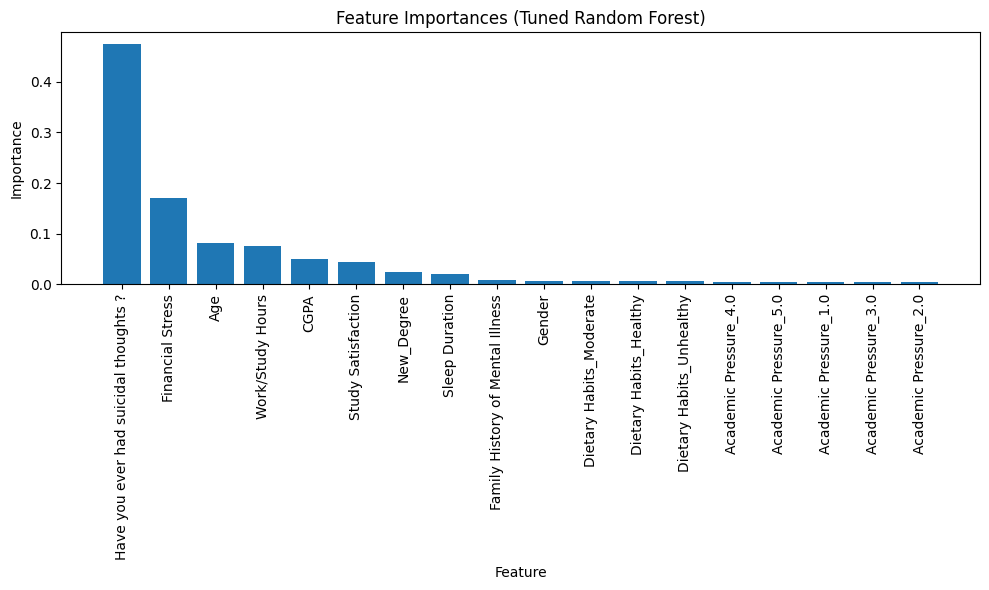

In [451]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances (Tuned Random Forest)")
plt.tight_layout()
plt.show()

In [452]:
# best model from tuning
best_rf_model = random_search_rf.best_estimator_
# Evaluate the best model
y_pred_rf_best = best_rf_model.predict(X_test)
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
precision_rf_best = precision_score(y_test, y_pred_rf_best, average='weighted')
recall_rf_best = recall_score(y_test, y_pred_rf_best, average='weighted')
f1_rf_best = f1_score(y_test, y_pred_rf_best, average='weighted')

print("Classification (After Tuning):")
print(f"Accuracy: {accuracy_rf_best:.4f}")
print(f"Precision: {precision_rf_best:.4f}")
print(f"Recall: {recall_rf_best:.4f}")
print(f"F1 Score: {f1_rf_best:.4f}")

Classification (After Tuning):
Accuracy: 0.8094
Precision: 0.8094
Recall: 0.8094
F1 Score: 0.8074


In [453]:
best_hyperparameters = {
    'Model': ['Logistic Regression', 'Random Forest'],
    'Best Parameters': [grid_search.best_params_, random_search_rf.best_params_],  # Store best params found
    'Best Cross-Validation Accuracy': [grid_search.best_score_, random_search_rf.best_score_]  # Store best CV accuracy
}

best_hyperparameters_df = pd.DataFrame(best_hyperparameters)
print("Best Hyperparameters for Both Models:")
print(best_hyperparameters_df)

Best Hyperparameters for Both Models:
                 Model                                    Best Parameters  \
0  Logistic Regression                        {'C': 0.1, 'max_iter': 100}   
1        Random Forest  {'n_estimators': 200, 'min_samples_split': 5, ...   

   Best Cross-Validation Accuracy  
0                        0.800424  
1                        0.804061  


Feature Selection

for logistic reg

In [454]:
X_train_balanced = np.array(X_train_balanced)
X_test = np.array(X_test)

feature_names = [
    "Gender", "Age", "CGPA", "Study Satisfaction", "Sleep Duration",
    "Have you ever had suicidal thoughts ?", "Work/Study Hours",
    "Financial Stress", "Family History of Mental Illness",
    "Academic Pressure_1.0", "Academic Pressure_2.0", "Academic Pressure_3.0",
    "Academic Pressure_4.0", "Academic Pressure_5.0",
    "Dietary Habits_Healthy", "Dietary Habits_Moderate", "Dietary Habits_Unhealthy",
    "New_Degree"
]

# Convert to DataFrame (required for feature selection, even if we convert back to NumPy later)
X_train_balanced_df = pd.DataFrame(X_train_balanced, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)

log_reg = LogisticRegression(max_iter=1000, random_state=42)

rfe_lr = RFE(estimator=best_model_lr, n_features_to_select=10)
rfe_lr.fit(X_train_balanced_df, y_train_balanced)

selected_features_lr = X_train_balanced_df.columns[rfe_lr.support_]
print("Selected Features (Logistic Regression):")
print(selected_features_lr)

Selected Features (Logistic Regression):
Index(['Age', 'CGPA', 'Study Satisfaction', 'Sleep Duration',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness',
       'Academic Pressure_3.0', 'Academic Pressure_4.0'],
      dtype='object')


In [455]:
X_train_rfe_lr = X_train_balanced_df[selected_features_lr]
X_test_rfe_lr = X_test_df[selected_features_lr]

# Train
best_model_lr.fit(X_train_rfe_lr, y_train_balanced)  # TRAIN USING BEST MODEL

# Evaluate
y_pred_rfe_lr = best_model_lr.predict(X_test_rfe_lr)

accuracy_rfe_lr = accuracy_score(y_test, y_pred_rfe_lr)
precision_rfe_lr = precision_score(y_test, y_pred_rfe_lr)
recall_rfe_lr = recall_score(y_test, y_pred_rfe_lr)
f1_rfe_lr = f1_score(y_test, y_pred_rfe_lr)

print("\nLogistic Regression (RFE):")
print(f"Accuracy: {accuracy_rfe_lr:.4f}")
print(f"Precision: {precision_rfe_lr:.4f}")
print(f"Recall: {recall_rfe_lr:.4f}")
print(f"F1 Score: {f1_rfe_lr:.4f}")


Logistic Regression (RFE):
Accuracy: 0.8046
Precision: 0.8387
Recall: 0.8198
F1 Score: 0.8292


for random forest


In [456]:
X_train_rfe_lr = np.array(X_train_rfe_lr)
X_test_rfe_lr = np.array(X_test_rfe_lr)

# Use the tuned Random Forest model for feature selection
sfm = SelectFromModel(best_rf_model, threshold='mean')  # You can adjust the threshold
sfm.fit(X_train, y_train)

selected_features_rf = feature_names[sfm.get_support().tolist().index(True):]
print("Selected Features (Random Forest):")
print(selected_features_rf)

# Transform the training and testing data
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

Selected Features (Random Forest):
['Age', 'CGPA', 'Study Satisfaction', 'Sleep Duration', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Academic Pressure_1.0', 'Academic Pressure_2.0', 'Academic Pressure_3.0', 'Academic Pressure_4.0', 'Academic Pressure_5.0', 'Dietary Habits_Healthy', 'Dietary Habits_Moderate', 'Dietary Habits_Unhealthy', 'New_Degree']


In [457]:
# Train a new Random Forest model with selected features
rf_model_selected = RandomForestClassifier(**best_params, random_state=42)
rf_model_selected.fit(X_train_selected, y_train)

# Make predictions
y_pred_rf_selected = rf_model_selected.predict(X_test_selected)

# Evaluate
accuracy_rf_selected = accuracy_score(y_test, y_pred_rf_selected)
precision_rf_selected = precision_score(y_test, y_pred_rf_selected, average='weighted')
recall_rf_selected = recall_score(y_test, y_pred_rf_selected, average='weighted')
f1_rf_selected = f1_score(y_test, y_pred_rf_selected, average='weighted')

print("\nRandom Forest (Selected Features):")
print(f"Accuracy: {accuracy_rf_selected:.4f}")
print(f"Precision: {precision_rf_selected:.4f}")
print(f"Recall: {recall_rf_selected:.4f}")
print(f"F1 Score: {f1_rf_selected:.4f}")


Random Forest (Selected Features):
Accuracy: 0.8021
Precision: 0.8015
Recall: 0.8021
F1 Score: 0.8005


                                 Feature  Importance
1  Have you ever had suicidal thoughts ?    0.564511
3                       Financial Stress    0.190743
0                                    Age    0.136191
2                       Work/Study Hours    0.108554


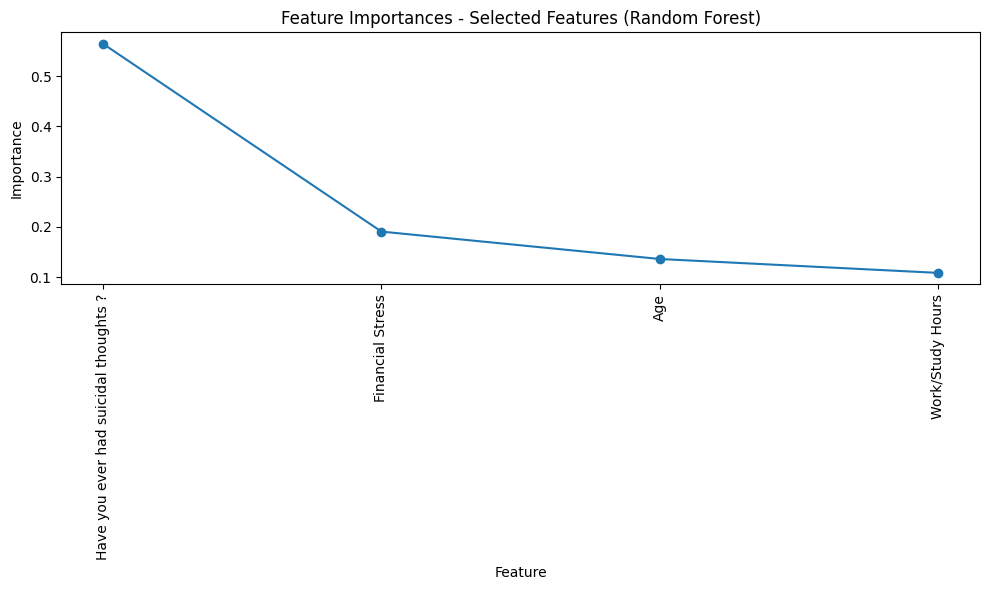

In [458]:
# Feature Importance (after selection)
feature_importances_selected = rf_model_selected.feature_importances_

# Create a list of the selected feature names
selected_feature_names = [feature_names[i] for i in range(len(feature_names)) if sfm.get_support()[i]]

feature_importance_df_selected = pd.DataFrame({'Feature': selected_feature_names, 'Importance': feature_importances_selected})
feature_importance_df_selected = feature_importance_df_selected.sort_values('Importance', ascending=False)
print(feature_importance_df_selected)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.plot(feature_importance_df_selected['Feature'], feature_importance_df_selected['Importance'], marker='o')
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances - Selected Features (Random Forest)")
plt.tight_layout()
plt.show()

In [459]:
performance_data_after_fs = {
    'Model': ['Logistic Regression (RFE)', 'Random Forest (SelectFromModel)'],
    'Accuracy': [accuracy_rfe_lr, accuracy_rf_selected],
    'Precision': [precision_rfe_lr, precision_rf_selected],
    'Recall': [recall_rfe_lr, recall_rf_selected],
    'F1 Score': [f1_rfe_lr, f1_rf_selected]
}

performance_df_after_fs = pd.DataFrame(performance_data_after_fs)
print("\nPerformance Comparison After Feature Selection:")
print(performance_df_after_fs)


Performance Comparison After Feature Selection:
                             Model  Accuracy  Precision    Recall  F1 Score
0        Logistic Regression (RFE)  0.804639   0.838730  0.819806  0.829160
1  Random Forest (SelectFromModel)  0.802102   0.801507  0.802102  0.800508


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


AUC Score for  Regression   :  0.8785336713955788
AUC Score for Classification:  0.8780524888905827


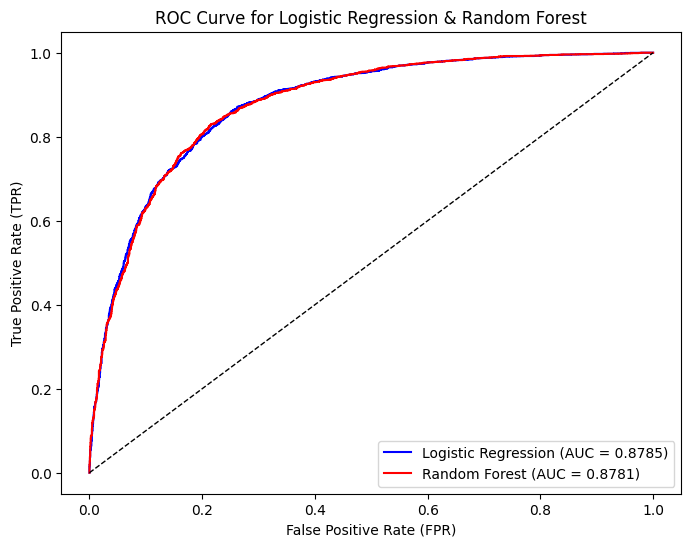

In [460]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# pred probabilites for both model
y_prob_logistic = best_model.predict_proba(X_test)[:, 1]  # Logistic Regression prob
y_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]  # Random Forest prob

# ROC curve and AUC score
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_logistic)
auc_log = roc_auc_score(y_test, y_prob_logistic)

# ROC curve and AUC score
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.4f})', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.4f})', color='red')

plt.plot([0, 1], [0, 1], linestyle='--', color='black', lw=1)

print("AUC Score for  Regression   : ",auc_log)
print("AUC Score for Classification: ",auc_rf)


plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Logistic Regression & Random Forest")
plt.legend(loc="lower right")
plt.show()



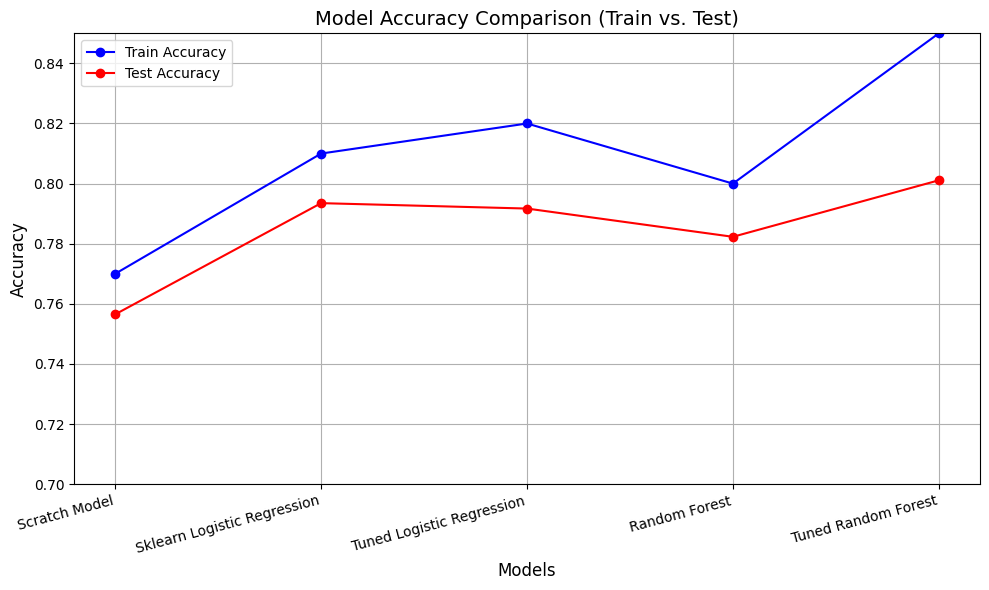

In [461]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and accuracy scores
models = ['Scratch Model', 'Sklearn Logistic Regression', 'Tuned Logistic Regression', 'Random Forest', 'Tuned Random Forest']
accuracy_scores_train = [0.77, 0.81, 0.82, 0.80, 0.85]  # Replace with your actual accuracy scores of train data
accuracy_scores_test = [0.7565, 0.7935, 0.7917, 0.7823, 0.8011]  # Replace with your actual accuracy scores of test data

# Create a line plot
plt.figure(figsize=(10, 6))

# Plotting train accuracy scores
plt.plot(models, accuracy_scores_train, marker='o', linestyle='-', color='blue', label='Train Accuracy')

# Plotting test accuracy scores
plt.plot(models, accuracy_scores_test, marker='o', linestyle='-', color='red', label='Test Accuracy')

# Add labels and title
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy Comparison (Train vs. Test)', fontsize=14)
plt.ylim(0.7, 0.85)  # Set y-axis limits for better visualization

# Add grid for better readability
plt.grid(True)

# Add legend to differentiate between train and test
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=15, ha='right')

# Show plot
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

